In [1]:
# 1 byte per pixel per channel (why? 256 values => 2^8)
# 3 bytes per pixel (why? RGB)
# 256 x 256 images: 3 * 2^16 = 3 * 65536 = 196608 bytes = 196KB

# BMP

In [2]:
import torch

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__() # initialization
        # size of the input: B x 1 x 28 x 28 images (1 ch, 28 x 28)
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2) # 1 in ch, 6 out ch, 5x5 kernel, padding 2
        # size of the hidden act: B x 6 x 28 x 28
        # after 2x2 pooling with stride 2: B x 6 x 14 x 14
        self.conv2 = nn.Conv2d(6, 16, 5) # 6 in ch, 16 out ch, 5x5 kernel
        # size of the hidden act: B x 16 x 10 x 10
        # after 2x2 pooling with stride 2: B x 16 x 5 x 5 => 400
        self.fc1   = nn.Linear(400, 120)
        # after fc1, B x 120
        self.fc2   = nn.Linear(120, 84)
        # after fc2, B x 84
        self.fc3   = nn.Linear(84, 10)
        # after fc3, B x 10

    def forward(self, x): # connecting all these pieces
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        # B x 16 x 5 x 5
        # => B x 400
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
le = LeNet()

In [5]:
le.conv1(images).shape

NameError: name 'images' is not defined

In [ ]:
F.relu(le.conv1(images)).shape

torch.Size([64, 6, 28, 28])

In [ ]:
F.max_pool2d(F.relu(le.conv1(images)), 2, 2).shape

torch.Size([64, 6, 14, 14])

In [ ]:
z = F.max_pool2d(F.relu(le.conv2(F.max_pool2d(F.relu(le.conv1(images)), 2, 2))), 2, 2)

In [ ]:
z.shape

torch.Size([64, 16, 5, 5])

In [ ]:
z.view(-1, 400).shape

torch.Size([64, 400])

In [ ]:
le(images).shape

torch.Size([64, 10])

In [ ]:
le.conv1.weight[0].shape

torch.Size([1, 5, 5])

In [ ]:
le.conv2.weight[0].shape

torch.Size([6, 5, 5])

In [ ]:
le.conv2.weight[15].shape

torch.Size([6, 5, 5])

In [ ]:
le.conv1.bias.shape

torch.Size([6])

In [ ]:
le.conv2.bias.shape

torch.Size([16])

In [ ]:
from torchvision import datasets, transforms

# Load MNIST dataset
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
data_loader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)
# Example usage: Accessing the first batch
images, labels = next(iter(data_loader))
print(images.shape)  # Output: torch.Size([64, 1, 28, 28])
print(labels.shape)  # Output: torch.Size([64])


torch.Size([64, 1, 28, 28])
torch.Size([64])


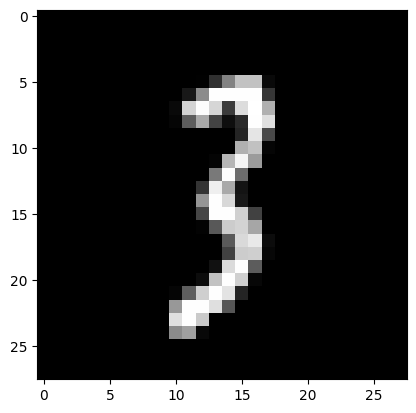

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
image_np = images[0].detach().numpy() # convert back to numpy
if image_np.shape[0] == 1: # getting rid of the first channel
    image_np = image_np[0]
plt.imshow(image_np, cmap='gray') # Use 'gray' colormap for grayscale images
plt.show()


In [ ]:
labels[0]

tensor(3)

In [ ]:
for i in range(100):
  while True:
    try:
        images, labels = next(iter(data_loader))
        print("Images shape:", images.shape)
        print("Labels shape:", labels.shape)

    except StopIteration:
        # End of dataset
        break